#Problem : This automotive marketing dataset enables predicting lifetime value. Use the target variable “Customer Lifetime Value” in the training file dataset.

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sbn
import matplotlib.pyplot as plt
from plotly import express as ex
import datetime as dt
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

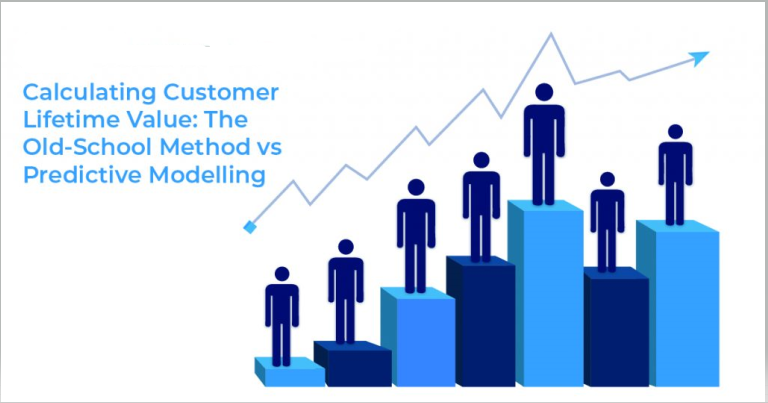

# Exploratory Analysis

In [15]:
data = pd.read_csv("squark_automotive_CLV_training_data.csv")

In [16]:
data.shape

(9134, 24)

We can see that we have 24 columns and 9134 rows

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       8099 non-null   object 
 1   State                          8099 non-null   object 
 2   Customer Lifetime Value        8099 non-null   float64
 3   Response                       8099 non-null   object 
 4   Coverage                       8099 non-null   object 
 5   Education                      8099 non-null   object 
 6   Effective To Date              8099 non-null   object 
 7   EmploymentStatus               8099 non-null   object 
 8   Gender                         8099 non-null   object 
 9   Income                         8099 non-null   float64
 10  Location Code                  8099 non-null   object 
 11  Marital Status                 8099 non-null   object 
 12  Monthly Premium Auto           8099 non-null   f

In [18]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274.0,Suburban,Married,69.0,32.0,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0.0,Suburban,Single,94.0,13.0,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767.0,Suburban,Married,108.0,18.0,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0.0,Suburban,Married,106.0,18.0,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836.0,Rural,Single,73.0,12.0,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see how the dates of each row is unordered and we want to sort it. We have NaN values too, and we want to delete it.

In [19]:
data = data.dropna()

We going to use the package re and several functions of pandas for to sort the dates

In [20]:
list_m = []
for e in data["Effective To Date"]:
  list_m.append(int(e[0]))
list_m

[2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,


In [21]:
import re
pattern = re.compile("/\d?\d/")
list_day = []
for d in data["Effective To Date"]:
  list_d = pattern.findall(d)
  list_d = list_d[0][1:-1]
  list_day.append(int(list_d))
list_day

[24,
 31,
 19,
 20,
 3,
 25,
 24,
 18,
 26,
 17,
 21,
 6,
 6,
 10,
 18,
 17,
 6,
 5,
 27,
 14,
 19,
 21,
 26,
 24,
 5,
 29,
 28,
 12,
 2,
 7,
 28,
 22,
 25,
 18,
 13,
 15,
 8,
 6,
 25,
 7,
 18,
 11,
 28,
 8,
 23,
 25,
 31,
 2,
 7,
 18,
 17,
 11,
 21,
 16,
 17,
 5,
 13,
 23,
 28,
 28,
 2,
 22,
 15,
 27,
 23,
 31,
 26,
 10,
 27,
 9,
 24,
 11,
 12,
 4,
 18,
 11,
 1,
 15,
 6,
 27,
 26,
 26,
 27,
 16,
 27,
 28,
 25,
 1,
 1,
 19,
 27,
 27,
 17,
 10,
 24,
 24,
 15,
 16,
 22,
 25,
 11,
 31,
 12,
 16,
 9,
 19,
 4,
 9,
 27,
 14,
 27,
 12,
 26,
 20,
 2,
 15,
 18,
 21,
 15,
 5,
 24,
 5,
 28,
 12,
 16,
 3,
 7,
 13,
 3,
 17,
 21,
 26,
 31,
 2,
 7,
 26,
 11,
 15,
 8,
 11,
 9,
 4,
 21,
 16,
 24,
 18,
 30,
 9,
 1,
 28,
 31,
 17,
 12,
 24,
 1,
 6,
 23,
 21,
 20,
 6,
 22,
 27,
 21,
 29,
 22,
 21,
 10,
 18,
 16,
 6,
 27,
 15,
 9,
 28,
 26,
 4,
 1,
 27,
 14,
 23,
 18,
 24,
 18,
 19,
 4,
 7,
 30,
 17,
 13,
 8,
 29,
 5,
 20,
 27,
 9,
 11,
 17,
 16,
 10,
 19,
 21,
 27,
 4,
 18,
 3,
 2,
 9,
 19,
 11,
 31,
 11,

In [22]:
dates = []
for m, d in zip(list_m, list_day):
  dates.append((dt.date(2011, m, d)))

In [23]:
date_index = pd.DatetimeIndex(dates)
date_index

DatetimeIndex(['2011-02-24', '2011-01-31', '2011-02-19', '2011-01-20',
               '2011-02-03', '2011-01-25', '2011-02-24', '2011-01-18',
               '2011-01-26', '2011-02-17',
               ...
               '2011-02-18', '2011-01-11', '2011-01-05', '2011-02-04',
               '2011-02-13', '2011-01-01', '2011-02-07', '2011-01-29',
               '2011-01-31', '2011-01-25'],
              dtype='datetime64[ns]', length=8099, freq=None)

In [24]:
data = data.set_index(date_index)
data = data.drop(["Effective To Date"], axis = 1)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2011-02-24,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,69.0,32.0,5.0,0.0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2011-01-31,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,94.0,13.0,42.0,0.0,8.0,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2011-02-19,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,108.0,18.0,38.0,0.0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
2011-01-20,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,106.0,18.0,65.0,0.0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
2011-02-03,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,73.0,12.0,44.0,0.0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01,UH22701,Oregon,9726.551005,No,Extended,Master,Employed,F,72236.0,Suburban,Married,80.0,2.0,29.0,0.0,2.0,Personal Auto,Personal L3,Offer2,Call Center,518.064733,Four-Door Car,Medsize
2011-02-07,IA85970,California,8099.466122,No,Basic,Bachelor,Unemployed,F,0.0,Urban,Divorced,112.0,19.0,42.0,0.0,6.0,Personal Auto,Personal L3,Offer1,Branch,438.812143,SUV,Medsize
2011-01-29,TC18240,Oregon,5020.473987,No,Basic,College,Employed,M,67890.0,Urban,Married,63.0,23.0,26.0,0.0,3.0,Personal Auto,Personal L3,Offer1,Agent,174.088540,Four-Door Car,Medsize
2011-01-31,GE58317,Arizona,4834.710493,Yes,Basic,College,Employed,F,38713.0,Suburban,Divorced,66.0,31.0,69.0,4.0,6.0,Personal Auto,Personal L3,Offer2,Call Center,316.800000,Four-Door Car,Medsize


In [25]:
data = data.sort_index(0)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2011-01-01,HQ32112,Arizona,5244.404750,No,Extended,High School or Below,Employed,M,68131.0,Rural,Married,130.0,22.0,27.0,0.0,1.0,Personal Auto,Personal L2,Offer4,Branch,226.607648,SUV,Medsize
2011-01-01,ST78006,Oregon,4594.263722,No,Basic,High School or Below,Unemployed,F,0.0,Rural,Married,63.0,11.0,10.0,1.0,3.0,Personal Auto,Personal L2,Offer4,Call Center,139.331764,Four-Door Car,Medsize
2011-01-01,OL27257,Nevada,4381.880534,No,Premium,College,Medical Leave,F,20394.0,Urban,Married,115.0,28.0,84.0,0.0,1.0,Personal Auto,Personal L3,Offer1,Branch,508.614758,Two-Door Car,Medsize
2011-01-01,IU83998,Washington,11196.460020,No,Premium,Bachelor,Unemployed,F,0.0,Suburban,Married,298.0,26.0,94.0,0.0,1.0,Personal Auto,Personal L3,Offer1,Branch,2145.600000,Luxury Car,Medsize
2011-01-01,ZO30377,California,3472.369996,No,Premium,High School or Below,Unemployed,M,0.0,Suburban,Single,102.0,25.0,48.0,0.0,1.0,Personal Auto,Personal L3,Offer2,Agent,976.112456,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-28,KM65135,Oregon,4763.327142,No,Basic,College,Disabled,M,14957.0,Suburban,Single,66.0,24.0,68.0,0.0,8.0,Corporate Auto,Corporate L3,Offer1,Branch,316.800000,Four-Door Car,Small
2011-02-28,CT84535,California,3885.456401,Yes,Premium,College,Unemployed,M,0.0,Suburban,Married,105.0,3.0,92.0,0.0,1.0,Personal Auto,Personal L3,Offer1,Branch,504.000000,Four-Door Car,Large
2011-02-28,PL33465,Arizona,4376.363592,Yes,Premium,Bachelor,Employed,F,63774.0,Rural,Divorced,111.0,18.0,63.0,0.0,1.0,Personal Auto,Personal L2,Offer2,Agent,60.036683,Four-Door Car,Medsize
2011-02-28,GN80437,Oregon,3444.967503,No,Extended,College,Unemployed,F,0.0,Suburban,Married,91.0,28.0,59.0,0.0,1.0,Special Auto,Special L2,Offer2,Branch,596.050118,Four-Door Car,Medsize


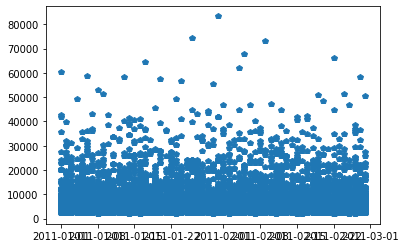

In [26]:
plt.plot(data["Customer Lifetime Value"], "p")

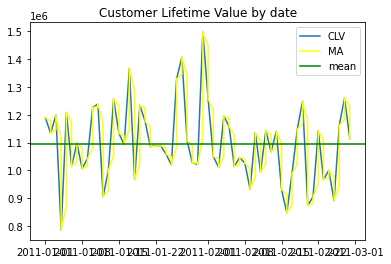

In [27]:
data["MA"] = data.groupby(data.index)["Customer Lifetime Value"].sum()
data["MA"] = data["MA"].rolling(5).mean()
plt.plot(data.groupby(data.index)["Customer Lifetime Value"].sum(), label = "CLV")
plt.plot(data["MA"], color = "yellow", label = "MA")
plt.axhline(np.mean(data.groupby(data.index)["Customer Lifetime Value"].sum()), color = "green", label = "mean")
plt.title("Customer Lifetime Value by date")
plt.legend()

In [28]:
data = data.drop(["MA"], axis = 1)

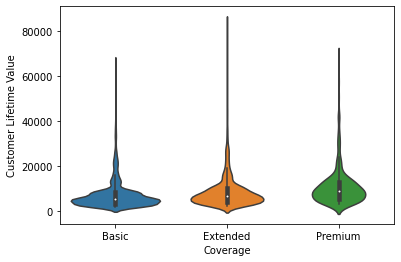

In [29]:
order_coverage = data.groupby(by = ["Coverage"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Coverage", y = "Customer Lifetime Value", data = data, order = order_coverage)

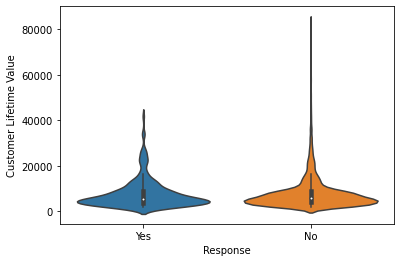

In [ ]:
order_response = data.groupby(by = ["Response"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Response", y = "Customer Lifetime Value", data = data, order = order_response)

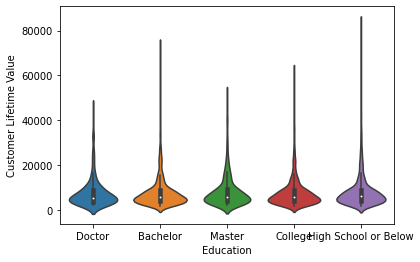

In [ ]:
order_Education = data.groupby(by = ["Education"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Education", y = "Customer Lifetime Value", data = data, order = order_Education)

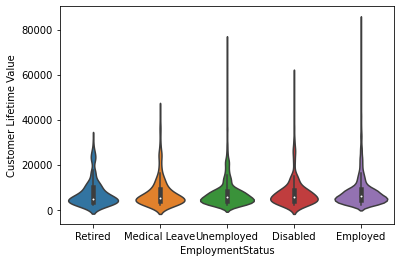

In [ ]:
order_EmploymentStatus = data.groupby(by = ["EmploymentStatus"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "EmploymentStatus", y = "Customer Lifetime Value", data = data, order = order_EmploymentStatus)

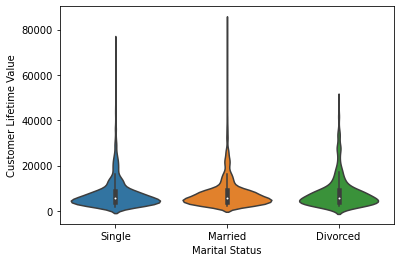

In [ ]:
order_Marital = data.groupby(by = ["Marital Status"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Marital Status", y = "Customer Lifetime Value", data = data, order = order_Marital)

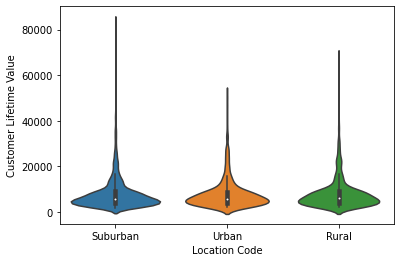

In [ ]:
order_Location = data.groupby(by = ["Location Code"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Location Code", y = "Customer Lifetime Value", data = data, order = order_Location)

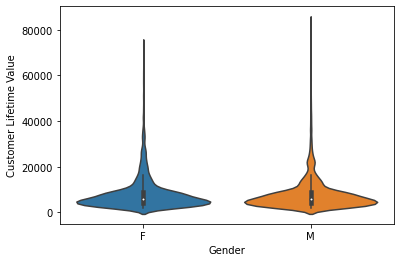

In [ ]:
order_Gender = data.groupby(by = ["Gender"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Gender", y = "Customer Lifetime Value", data = data, order = order_Gender)

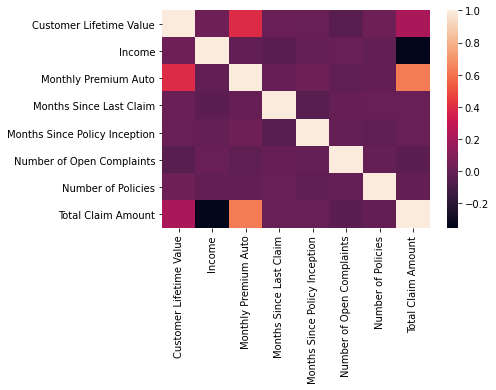

In [ ]:
sbn.heatmap(data.corr())

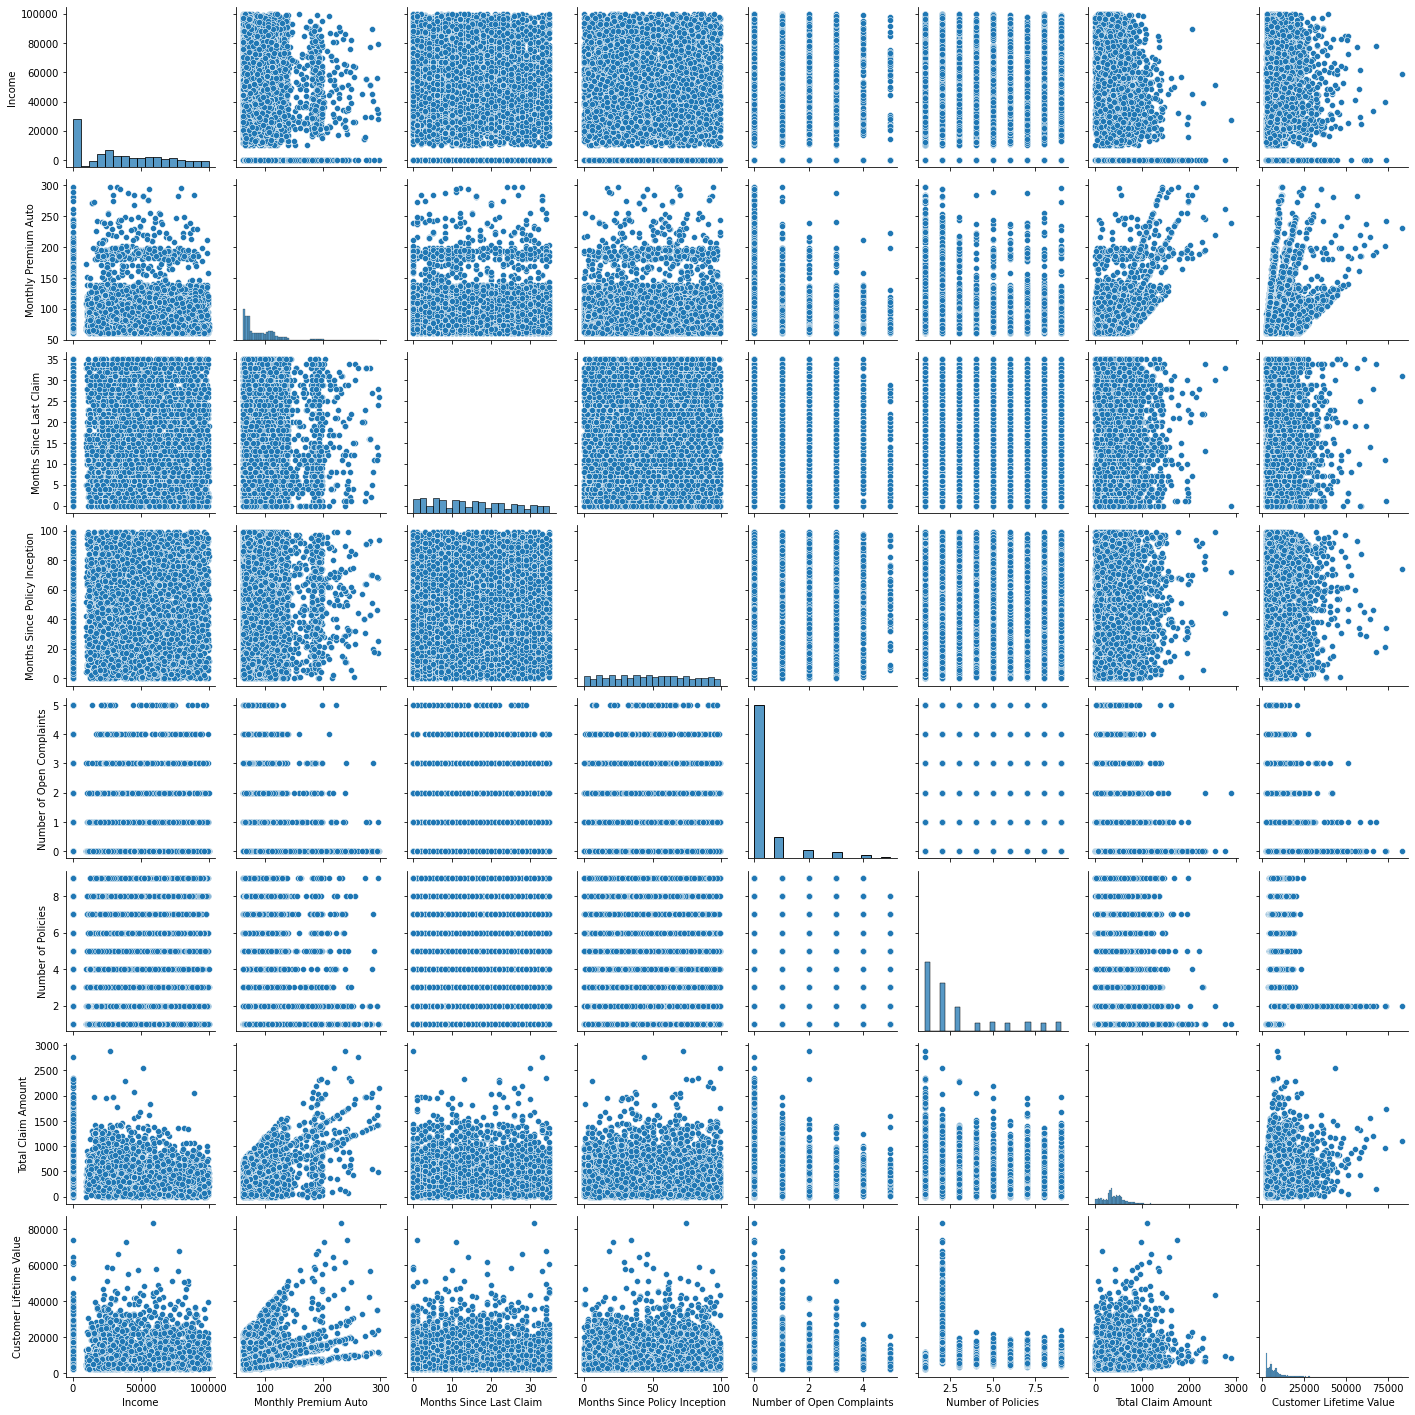

In [ ]:
data_pair = data[["Income", "Monthly Premium Auto", "Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies", "Total Claim Amount", "Customer Lifetime Value"]]
sbn.pairplot(data_pair)

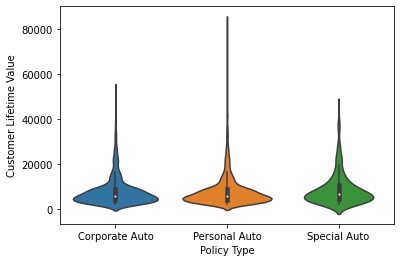

In [ ]:
order_Policy = data.groupby(by = ["Policy Type"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Policy Type", y = "Customer Lifetime Value", data = data, order = order_Policy)

Index(['Corporate L2', 'Personal L3', 'Corporate L3', 'Personal L2',
       'Personal L1', 'Special L1', 'Special L2', 'Special L3',
       'Corporate L1'],
      dtype='object', name='Policy')

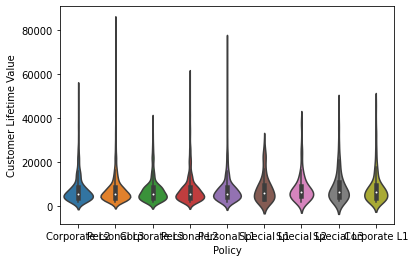

In [ ]:
order_Policy2 = data.groupby(by = ["Policy"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Policy", y = "Customer Lifetime Value", data = data, order = order_Policy2)

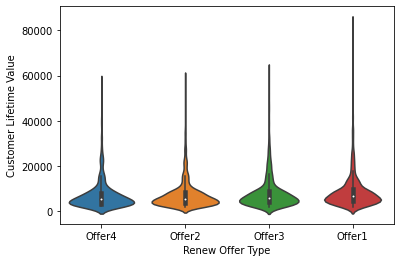

In [ ]:
order_Renew = data.groupby(by = ["Renew Offer Type"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Renew Offer Type", y = "Customer Lifetime Value", data = data, order = order_Renew)

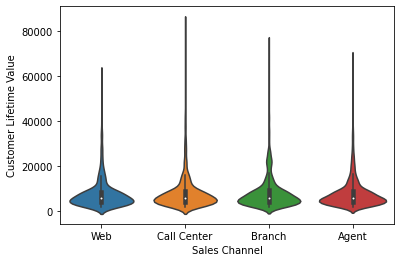

In [ ]:
order_Sales = data.groupby(by = ["Sales Channel"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Sales Channel", y = "Customer Lifetime Value", data = data, order = order_Sales)

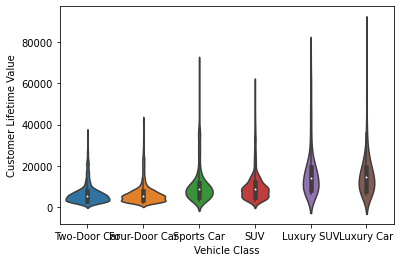

In [ ]:
order_vehicle = data.groupby(by = ["Vehicle Class"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Vehicle Class", y = "Customer Lifetime Value", data = data, order = order_vehicle)

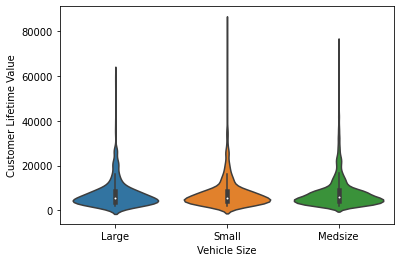

In [ ]:
order_Vehicle2 = data.groupby(by = ["Vehicle Size"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "Vehicle Size", y = "Customer Lifetime Value", data = data, order = order_Vehicle2)

In [55]:
state = pd.pivot_table(data, values='Customer Lifetime Value', index=['State'],
                    columns=[], aggfunc=np.mean).reset_index()
state["State"] = ["AZ", "CA", "NV", "OR", "WA"]
state

,State,Customer Lifetime Value
0,AZ,7855.485055
1,CA,7962.001036
2,NV,7987.139540
3,OR,8084.560493
4,WA,7970.167604


In [56]:
fig = ex.choropleth(state, locations = state['State'].unique(),color = state['Customer Lifetime Value'],locationmode='USA-states',hover_name = state['Customer Lifetime Value'], color_continuous_scale = ex.colors.sequential.Inferno, scope = "usa")
fig.update_layout(title='Customer Lifetime Value',template='plotly_dark')
fig.show()

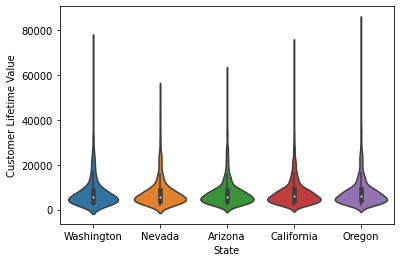

In [57]:
order_state = data.groupby(by = ["State"])["Customer Lifetime Value"].median().sort_values().index
sbn.violinplot(x = "State", y = "Customer Lifetime Value", data = data, order = order_state)

Conclutions exploratory analysis:
- Seems be that we have a non linear problem
- The variance of each group differs with others one
- Seems be that Monthly premium auto is the most variable correlationated with CLV
- Oregon has the the most CLV most value

# Bulding a Model

We will choose the variables that are most correlationated with Customer Lifetime Value

In [59]:
data = data.drop(["Customer"], axis = 1)
data = pd.get_dummies(data)
data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_F,Gender_M,Location Code_Rural,Location Code_Suburban,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
2011-01-01,5244.404750,68131.0,130.0,22.0,27.0,0.0,1.0,226.607648,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2011-01-01,4594.263722,0.0,63.0,11.0,10.0,1.0,3.0,139.331764,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
2011-01-01,4381.880534,20394.0,115.0,28.0,84.0,0.0,1.0,508.614758,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2011-01-01,11196.460020,0.0,298.0,26.0,94.0,0.0,1.0,2145.600000,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2011-01-01,3472.369996,0.0,102.0,25.0,48.0,0.0,1.0,976.112456,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-28,4763.327142,14957.0,66.0,24.0,68.0,0.0,8.0,316.800000,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2011-02-28,3885.456401,0.0,105.0,3.0,92.0,0.0,1.0,504.000000,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2011-02-28,4376.363592,63774.0,111.0,18.0,63.0,0.0,1.0,60.036683,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2011-02-28,3444.967503,0.0,91.0,28.0,59.0,0.0,1.0,596.050118,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [60]:
data = data.drop(["Coverage_Basic", "State_Washington", "Response_Yes", "Education_Doctor", "EmploymentStatus_Retired", "Marital Status_Single", "Gender_F", "Location Code_Suburban", "Policy Type_Corporate Auto", "Policy_Corporate L2", "Renew Offer Type_Offer4", "Sales Channel_Web", "Vehicle Class_Two-Door Car", "Vehicle Size_Large"], axis = 1)
data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,State_Nevada,State_Oregon,Response_No,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Unemployed,Gender_M,Location Code_Rural,Location Code_Urban,Marital Status_Divorced,Marital Status_Married,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L1,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Size_Medsize,Vehicle Size_Small
2011-01-01,5244.404750,68131.0,130.0,22.0,27.0,0.0,1.0,226.607648,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2011-01-01,4594.263722,0.0,63.0,11.0,10.0,1.0,3.0,139.331764,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2011-01-01,4381.880534,20394.0,115.0,28.0,84.0,0.0,1.0,508.614758,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2011-01-01,11196.460020,0.0,298.0,26.0,94.0,0.0,1.0,2145.600000,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
2011-01-01,3472.369996,0.0,102.0,25.0,48.0,0.0,1.0,976.112456,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-28,4763.327142,14957.0,66.0,24.0,68.0,0.0,8.0,316.800000,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2011-02-28,3885.456401,0.0,105.0,3.0,92.0,0.0,1.0,504.000000,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2011-02-28,4376.363592,63774.0,111.0,18.0,63.0,0.0,1.0,60.036683,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2011-02-28,3444.967503,0.0,91.0,28.0,59.0,0.0,1.0,596.050118,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [61]:
exog = sm.add_constant(data.drop(["Customer Lifetime Value"], axis = 1).to_numpy(), prepend = False)
model = sm.OLS(data["Customer Lifetime Value"].to_numpy(), exog)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     34.60
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          9.74e-286
Time:                        14:25:45   Log-Likelihood:                -82259.
No. Observations:                8099   AIC:                         1.646e+05
Df Residuals:                    8050   BIC:                         1.650e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.004     -0.451      0.6

In [62]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.regression.linear_model import OLSResults
het_breuschpagan(result.resid, data.drop(["Customer Lifetime Value"], axis = 1).to_numpy())

(998.1124055433344,
 3.8879587787614452e-177,
 23.576286738032117,
 5.0314902735330497e-191)

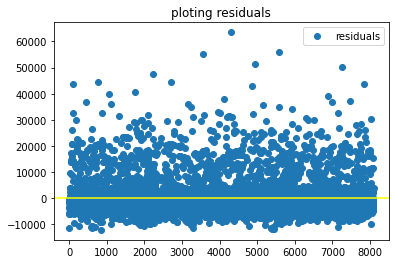

In [63]:
plt.plot(result.resid, "o", label ="residuals")
plt.axhline(y = 0, color = "yellow")
plt.title("ploting residuals")
plt.legend()

We have a heteroskedasticity problem fot to know which variables are significative

In [64]:
model_robust = sm.OLS(data["Customer Lifetime Value"].to_numpy(), exog)
result_robust = model_robust.fit(cov_type = "HC0")
print(result_robust.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 50, but rank is 48



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     26.90
Date:                Sat, 17 Apr 2021   Prob (F-statistic):          5.36e-220
Time:                        14:26:31   Log-Likelihood:                -82259.
No. Observations:                8099   AIC:                         1.646e+05
Df Residuals:                    8050   BIC:                         1.650e+05
Df Model:                          48                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.004     -0.457      0.6

In [65]:
data_pvalues = pd.DataFrame(data = {"Variables": data.drop(["Customer Lifetime Value"], axis = 1).columns, "Pvalues": result_robust.pvalues[0:-1]})
data_pvalues

,Variables,Pvalues
0,Income,6.477065e-01
1,Monthly Premium Auto,9.158243e-07
2,Months Since Last Claim,2.711243e-01
3,Months Since Policy Inception,6.009732e-01
4,Number of Open Complaints,4.669462e-05
5,Number of Policies,1.549570e-04
6,Total Claim Amount,1.533691e-01
7,State_Arizona,7.341757e-01
8,State_California,7.257782e-01
9,State_Nevada,8.082779e-01


In [67]:
data_pvalues.loc[data_pvalues["Pvalues"] < 0.05,]

,Variables,Pvalues
1,Monthly Premium Auto,9.158243e-07
4,Number of Open Complaints,4.669462e-05
5,Number of Policies,1.549570e-04
19,EmploymentStatus_Employed,9.202340e-02
27,Policy Type_Personal Auto,1.253875e-02
28,Policy Type_Special Auto,1.456470e-03
29,Policy_Corporate L1,2.460629e-02
37,Renew Offer Type_Offer1,1.891252e-07
39,Renew Offer Type_Offer3,1.270700e-02


In [68]:
data_to_fit = data[["Customer Lifetime Value", "Monthly Premium Auto", "Number of Open Complaints", "Number of Policies", "Policy Type_Special Auto", "Renew Offer Type_Offer1", "Policy Type_Personal Auto", "Policy_Corporate L1", "Renew Offer Type_Offer3"]]
data_to_fit

,Customer Lifetime Value,Monthly Premium Auto,Number of Open Complaints,Number of Policies,Policy Type_Special Auto,Renew Offer Type_Offer1,Policy Type_Personal Auto,Policy_Corporate L1,Renew Offer Type_Offer3
2011-01-01,5244.404750,130.0,0.0,1.0,0,0,1,0,0
2011-01-01,4594.263722,63.0,1.0,3.0,0,0,1,0,0
2011-01-01,4381.880534,115.0,0.0,1.0,0,1,1,0,0
2011-01-01,11196.460020,298.0,0.0,1.0,0,1,1,0,0
2011-01-01,3472.369996,102.0,0.0,1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2011-02-28,4763.327142,66.0,0.0,8.0,0,1,0,0,0
2011-02-28,3885.456401,105.0,0.0,1.0,0,1,1,0,0
2011-02-28,4376.363592,111.0,0.0,1.0,0,0,1,0,0
2011-02-28,3444.967503,91.0,0.0,1.0,1,0,0,0,0


In [69]:
model_bagging = BaggingRegressor(n_estimators = 30)
scores_bagging = cross_val_score(model_bagging, data_to_fit.drop(["Customer Lifetime Value"], axis = 1).to_numpy(), data_to_fit["Customer Lifetime Value"].to_numpy(), cv = 10, scoring = "r2")
np.mean(scores_bagging)

0.5642437272774374

In [71]:
data_test = pd.read_csv("squark_automotive_CLV_production_data.csv")
data_test = data_test.drop(["Customer", "State", "Response", "Coverage", "Education", "Effective To Date", "EmploymentStatus", "Gender", "Location Code", "Marital Status", "Months Since Last Claim", "Months Since Policy Inception", "Sales Channel", "Total Claim Amount", "Vehicle Class", "Vehicle Size", "Income"], axis = 1)
data_test = pd.get_dummies(data_test)
data_test = data_test[["Monthly Premium Auto","Number of Open Complaints","Number of Policies","Policy Type_Personal Auto","Policy Type_Special Auto","Policy_Corporate L1","Renew Offer Type_Offer1","Renew Offer Type_Offer3"]]

In [72]:
model_bagging.fit(data_to_fit.drop(["Customer Lifetime Value"], axis = 1).to_numpy(), data_to_fit["Customer Lifetime Value"].to_numpy())
predictions = model_bagging.predict(data_test.to_numpy())

In [73]:
data_predictions = pd.read_csv("squark_automotive_CLV_production_data.csv")
data_predictions["CLV predictions"] = predictions
data_predictions

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV predictions
0,FH77504,California,Yes,Premium,Bachelor,1/24/2011,Employed,F,51643,Suburban,Single,283,16,43,0,1,Personal Auto,Personal L3,Offer2,Agent,1358.400000,Luxury Car,Medsize,11009.130490
1,XK87182,Oregon,No,Premium,College,1/25/2011,Employed,F,46402,Urban,Married,113,7,2,0,1,Personal Auto,Personal L3,Offer1,Agent,476.385575,Four-Door Car,Medsize,4475.340487
2,HB17438,Washington,No,Extended,Bachelor,2/21/2011,Employed,M,92044,Urban,Married,132,7,77,0,3,Personal Auto,Personal L1,Offer4,Web,617.288574,SUV,Medsize,9665.447005
3,DH18269,Arizona,No,Extended,College,1/13/2011,Medical Leave,M,16040,Suburban,Divorced,96,29,93,0,2,Personal Auto,Personal L3,Offer1,Branch,611.476898,Two-Door Car,Medsize,26238.504366
4,DP19820,Oregon,No,Extended,College,1/15/2011,Unemployed,M,0,Suburban,Single,135,12,84,4,2,Personal Auto,Personal L2,Offer2,Branch,980.528170,SUV,Small,20848.447163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,LA72316,California,No,Basic,Bachelor,2/10/2011,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10500.219464
1031,PK87824,California,Yes,Extended,College,2/12/2011,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,3158.228297
1032,TD14365,California,No,Extended,Bachelor,2/6/2011,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,10535.357771
1033,UP19263,California,No,Extended,College,2/3/2011,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,7583.903822


In [74]:
data_predictions.to_csv("predictions.csv")